<a href="https://colab.research.google.com/github/MarceloFBorba/Desafios-Pantanal-Dev/blob/main/Atividade1_Pantanal_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando dados no Drive

In [ ]:
import pandas as pd
from imblearn.datasets import make_imbalance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PantanalDev/creditcard.csv')

In [ ]:
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df[['Time', 'Amount']].describe(include='all').round()


,Time,Amount
count,284807.0,284807.0
mean,94814.0,88.0
std,47488.0,250.0
min,0.0,0.0
25%,54202.0,6.0
50%,84692.0,22.0
75%,139320.0,77.0
max,172792.0,25691.0


## Random Undersampling
Estratégia de redução de exemplos da classe majoritária para ter a mesma quantidade de exemplos da classe minoritária.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
under_sampler = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = under_sampler.fit_resample(X, y)

In [ ]:
freq_class = sorted(Counter(y).items())
freq_classU = sorted(Counter(y_under).items())
print('Antes =',freq_class)
print('Depois = ', freq_classU)

Antes = [(0, 284315), (1, 492)]
Depois =  [(0, 492), (1, 492)]


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='not minority')
X_under, y_under = undersample.fit_resample(X, y)

freq_classU = sorted(Counter(y_under).items())
print(freq_class)
print(freq_classU)

[(0, 284315), (1, 492)]
[(0, 492), (1, 492)]


## Random Oversampling
Estratégia de amostragem em que ao invés de remover (under) é replicado (over) os dados da classe minoritária até ter a mesma quantidade que a classe majoritária (ou uma quantidade definida).

*   sampling_strategy='minority' : Aumenta os dados da classe minoritária.
*   sampling_strategy='not minority': Aumenta os dados de todas as classes exceto a minoritária.
*   sampling_strategy='not majority': Aumenta os dados de todas as classes exceto a majoritária.



In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over__sampler = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = over__sampler.fit_resample(X, y)
freq_classO = sorted(Counter(y_over).items())
print('Antes = ', freq_class)
print('Depois = ', freq_classO)

Antes =  [(0, 284315), (1, 492)]
Depois =  [(0, 284315), (1, 284315)]


In [ ]:
over__sampler = RandomOverSampler(sampling_strategy='not minority')

X_over, y_over = over__sampler.fit_resample(X, y)
freq_classO = sorted(Counter(y_over).items())
print('Antes = ', freq_class)
print('Depois = ', freq_classO)

Antes =  [(0, 284315), (1, 492)]
Depois =  [(0, 284315), (1, 492)]


In [ ]:
over__sampler = RandomOverSampler(sampling_strategy='not majority')

X_over, y_over = over__sampler.fit_resample(X, y)
freq_classO = sorted(Counter(y_over).items())
print('Antes = ', freq_class)
print('Depois = ', freq_classO)

Antes =  [(0, 284315), (1, 492)]
Depois =  [(0, 284315), (1, 284315)]


## SMOTE
Synthetic Minority Oversampling Technique é uma estratégia de oversampling baseada em vizinhos mais próximos para selecionar os objetos as serem amostrados.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

SM = SMOTE(sampling_strategy='minority')
X_smote, y_smote = SM.fit_resample(X, y)
freq_classS = sorted(Counter(y_smote).items())
print('Antes = ', freq_class)
print('Depois = ', freq_classS)

Antes =  [(0, 284315), (1, 492)]
Depois =  [(0, 284315), (1, 284315)]


In [ ]:
print(X_smote.shape)

(568630, 30)


## 3-NN
Avaliar o impacto na base de dados do detecção de fraudes em cartões de créditos com o algoritmo de classificação 3-NN.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     56853
           1       0.96      0.99      0.97     56873

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [ ]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[54447  2406]
 [  839 56034]]


## Matriz de Confusão

<Axes: >

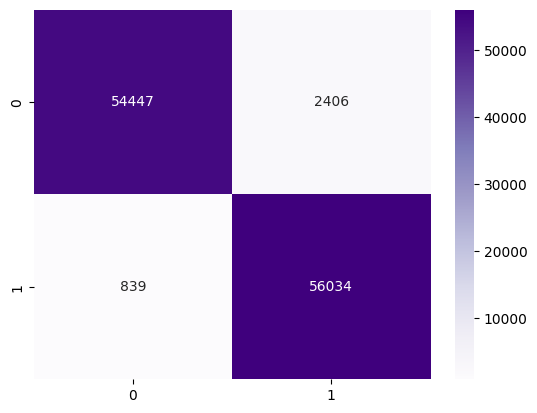

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Purples')